In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import folium
from folium.features import GeoJsonTooltip

In [2]:
from folium import plugins

In [3]:
shp = gpd.read_file('Data/dfci_stats_python.shp')

In [4]:
shp.columns

Index(['NOM', 'DFCI', 'Nombre d'i', 'Somme d'in', 'Surface ve', 'Ratio',
       'climat_maj', 'mnt_mean', 'vitesseVen', 'geometry'],
      dtype='object')

In [5]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'Stamen', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava'])

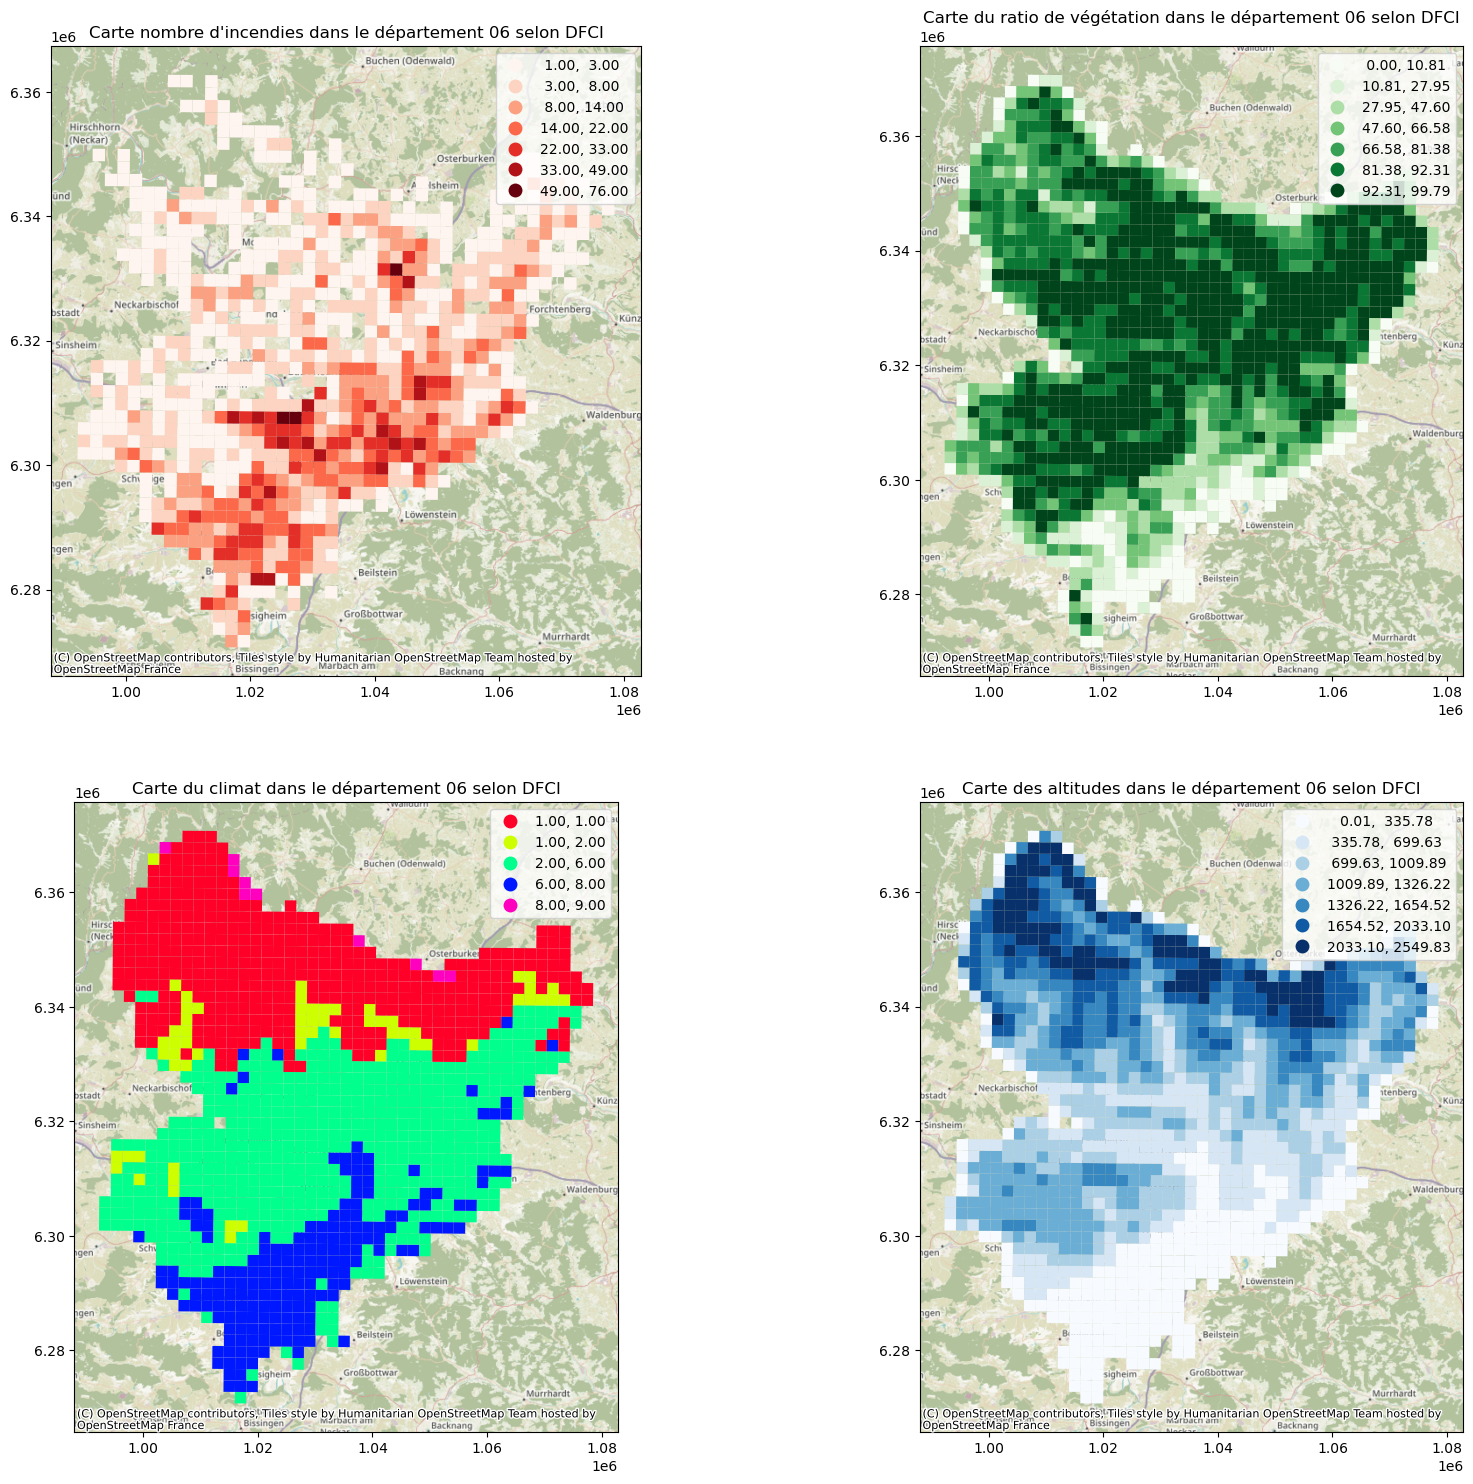

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(20,18))
shp.plot(column="Nombre d'i", cmap="Reds", scheme='FisherJenks', k=7, ax=ax[0, 0], legend=True)
ax[0, 0].set_title("Carte nombre d'incendies dans le département 06 selon DFCI")
ctx.add_basemap(ax[0,0], url=ctx.providers.OpenWeatherMap)
shp.plot(column="Ratio", cmap="Greens", scheme='FisherJenks', k=7, ax=ax[0, 1], legend=True)
ax[0, 1].set_title("Carte du ratio de végétation dans le département 06 selon DFCI")
ctx.add_basemap(ax[0,1], url=ctx.providers.OPNVKarte)
shp.plot(column="climat_maj", cmap="gist_rainbow", scheme='FisherJenks', k=5, ax=ax[1, 0], legend=True)
ax[1, 0].set_title("Carte du climat dans le département 06 selon DFCI")
ctx.add_basemap(ax[1,0], url=ctx.providers.OpenTopoMap)
shp.plot(column="mnt_mean", cmap="Blues", scheme='FisherJenks', k=7, ax=ax[1, 1], legend=True)
ax[1, 1].set_title("Carte des altitudes dans le département 06 selon DFCI")
ctx.add_basemap(ax[1,1], url=ctx.providers.OpenFireMap)
plt.show()

In [7]:
# Créer la carte
m = folium.Map(
    location=[43.923988, 7.157704],
    zoom_start=9,
    min_zoom=7,           # Zoom minimum autorisé
    max_zoom=12           # Zoom maximum autorisé
)

# Ajouter des cartes choroplètes pour chaque attribut
attributes = ["Nombre d'i", "Ratio", "climat_maj", "mnt_mean"]
colors = ['Reds', 'Greens', 'Reds', 'Blues']

for attr, color in zip(attributes, colors):
    data = pd.DataFrame({
        'NOM': shp['NOM'],           # Identifiants des régions
        attr: shp[attr]              # Valeurs à représenter
    })

    choropleth = folium.Choropleth(
        geo_data=shp,                 # GeoDataFrame avec la géométrie
        data=data,                    # DataFrame ou dictionnaire
        columns=['NOM', attr],        # Noms des colonnes à utiliser
        key_on='feature.properties.NOM',  # Chemin vers l'identifiant dans le GeoJSON
        fill_color=color,
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'{attr}',
        name=f'Carte - {attr}'
    )
    
    # Ajouter un effet de survol
    choropleth.geojson.add_child(
        GeoJsonTooltip(fields=['NOM', attr], aliases=['Région', f'{attr}'], sticky=True)
    )

    for feature in choropleth.geojson.data['features']:
        feature['properties']['style'] = {
            'fillOpacity': 0.7,
            'color': 'black',
            'weight': 0.2
        }
        feature['properties']['highlight'] = {
            'fillOpacity': 1.0,  # Augmenter l'opacité au survol
            'color': 'yellow',
            'weight': 0.4
        }

    choropleth.add_to(m)

    choropleth.color_scale.caption_font_size = '8pt'  # Ajuster la taille du texte de la légende

# Ajouter le contrôle des couches
folium.LayerControl(collapsed=True).add_to(m)

# Ajouter le bouton plein écran
plugins.Fullscreen(
    position='topleft',
    title='Plein écran',
    title_cancel='Quitter le plein écran',
    force_separate_button=True
).add_to(m)

# Afficher la carte
m

In [8]:
import leafmap

In [9]:
mp = leafmap.Map(center=(43.923988, 7.157704), zoom=9)
mp.add_data(
    shp, column="Ratio", scheme="EqualInterval", cmap="Greens", legend_title="Ratio de végétation"
)
mp

Map(center=[43.923988, 7.157704], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …